In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For data preprocessing 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Models Importing
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR

# For Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, plot_confusion_matrix, precision_score, recall_score,r2_score, mean_squared_error, f1_score
from sklearn.model_selection import cross_val_score

df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
gender_le = LabelEncoder()
df['Sex'] = gender_le.fit_transform(df['Sex'])

cp_le = LabelEncoder()
df['ChestPainType'] = cp_le.fit_transform(df['ChestPainType'])

RestingECG_le = LabelEncoder()
df['RestingECG'] = RestingECG_le.fit_transform(df['RestingECG'])

ExerciseAngina_le = LabelEncoder()
df['ExerciseAngina'] = ExerciseAngina_le.fit_transform(df['ExerciseAngina'])

ST_Slope_le = LabelEncoder()
df['ST_Slope'] = ST_Slope_le.fit_transform(df['ST_Slope'])

In [4]:
scaler = StandardScaler()
df.iloc[:,:-1] = scaler.fit_transform(df.iloc[:,:-1])

In [5]:
# Extract the target and feature columns
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

# Spliting the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Displaying the train and test data shape
print("Train data:", X_train.shape)
print("Test data:", X_test.shape)

Train data: (615, 11)
Test data: (303, 11)


In [6]:
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    plt.figure(figsize=(10,10))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

========== Decision tree ==========

Accuracy on validation set: 0.7459

Classification report : 
               precision    recall  f1-score   support

           0       0.65      0.81      0.72       123
           1       0.85      0.70      0.77       180

    accuracy                           0.75       303
   macro avg       0.75      0.76      0.74       303
weighted avg       0.77      0.75      0.75       303


Confusion Matrix : 
 [[100  23]
 [ 54 126]]


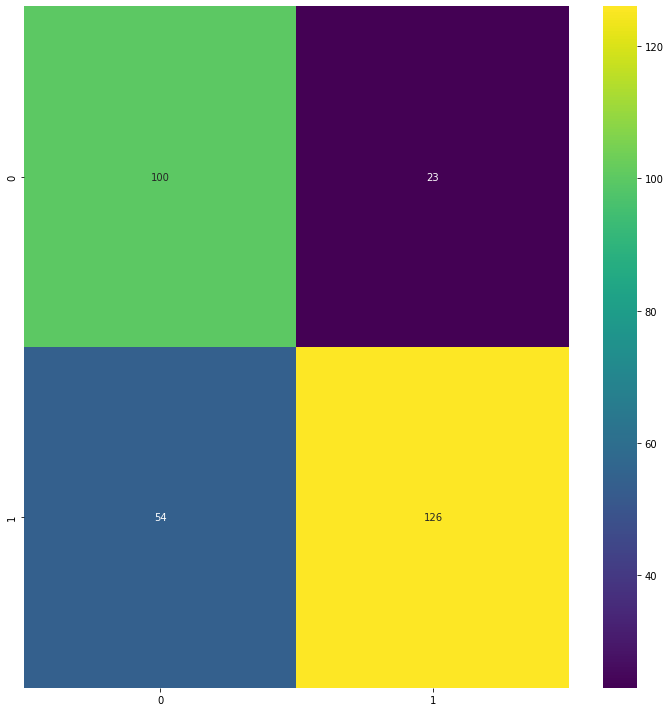

========== Random Forest ==========

Accuracy on validation set: 0.8713

Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       123
           1       0.93      0.84      0.89       180

    accuracy                           0.87       303
   macro avg       0.87      0.88      0.87       303
weighted avg       0.88      0.87      0.87       303


Confusion Matrix : 
 [[112  11]
 [ 28 152]]


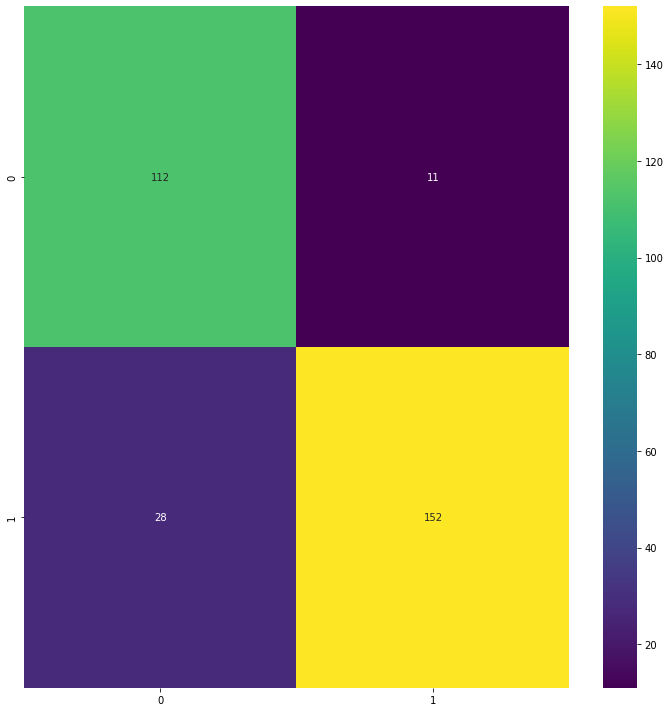

========== Logistic Regression ==========

Accuracy on validation set: 0.8581

Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       123
           1       0.92      0.83      0.87       180

    accuracy                           0.86       303
   macro avg       0.85      0.86      0.86       303
weighted avg       0.87      0.86      0.86       303


Confusion Matrix : 
 [[110  13]
 [ 30 150]]


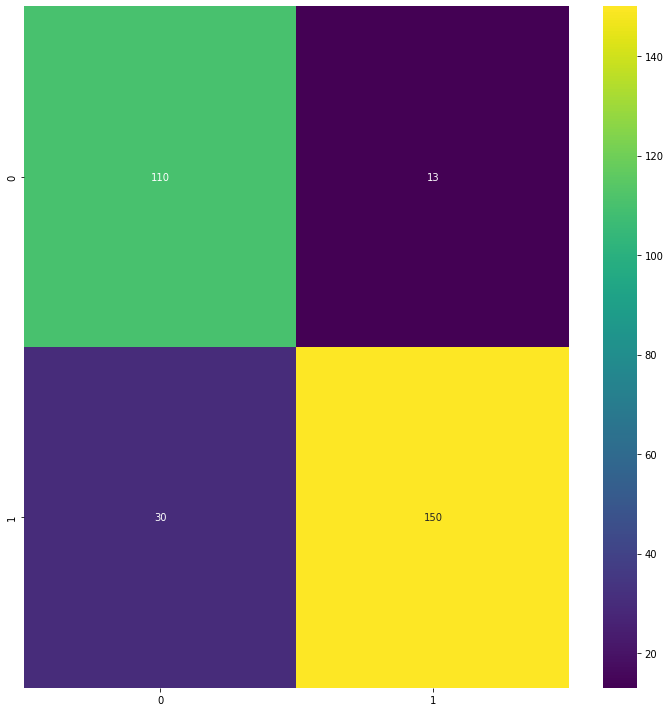

========== SVC ==========

Accuracy on validation set: 0.8779

Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       123
           1       0.91      0.88      0.90       180

    accuracy                           0.88       303
   macro avg       0.87      0.88      0.87       303
weighted avg       0.88      0.88      0.88       303


Confusion Matrix : 
 [[108  15]
 [ 22 158]]


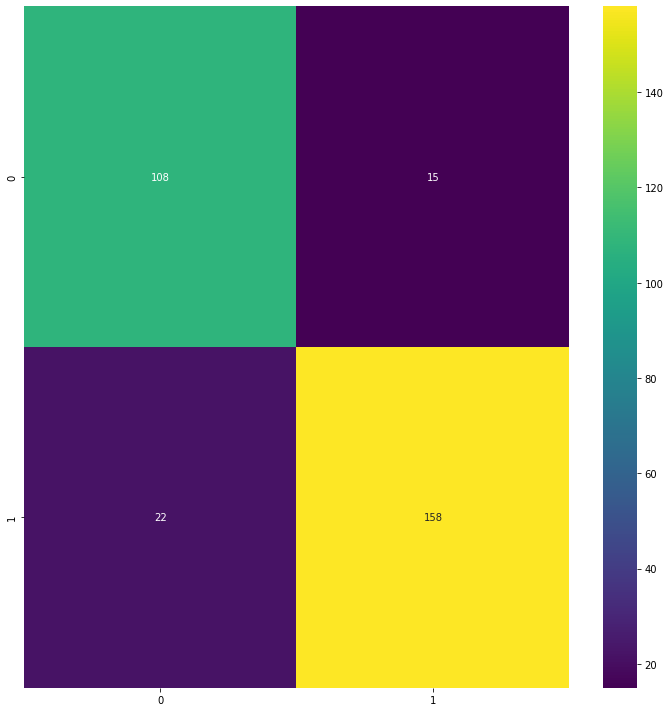

========== KNN Classifier ==========

Accuracy on validation set: 0.8779

Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       123
           1       0.91      0.88      0.90       180

    accuracy                           0.88       303
   macro avg       0.87      0.88      0.87       303
weighted avg       0.88      0.88      0.88       303


Confusion Matrix : 
 [[108  15]
 [ 22 158]]


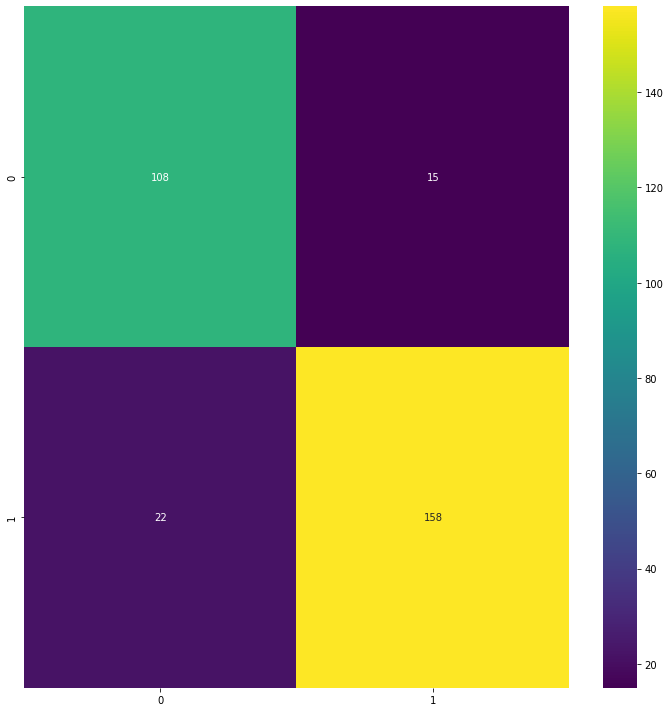

In [7]:
# For Decision tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)
result_dt = modelEvaluation(pred_dt, y_test, 'Decision tree')

# For Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
result_rf = modelEvaluation(pred_rf, y_test, 'Random Forest')

# Naive Bayes Classifier
# nb_model = MultinomialNB()
# nb_model.fit(X_train,y_train)
# pred_nb = nb_model.predict(X_test)
# results_nb = modelEvaluation(pred_nb, y_test, 'Naive Bayes')

# For Logistic Regression Classifier
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)
results_lr = modelEvaluation(pred_lr, y_test, 'Logistic Regression')

# For State Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)
pred_svc = svc_model.predict(X_test)
results_svc = modelEvaluation(pred_svc, y_test, 'SVC')

# For KNN Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
pred_knn = svc_model.predict(X_test)
results_knn = modelEvaluation(pred_knn, y_test, 'KNN Classifier')

In [8]:
import pickle
pickle.dump(rf_model, open("model.pickle", "wb"))

In [9]:
model = pickle.load(open("model.pickle", "rb"))

In [10]:
model.predict(X_test)

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114,0
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078,1
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114,0
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078,1
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114,0


In [12]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114,0
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078,1
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114,0
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078,1
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114,0


In [13]:
df.MaxHR.unique().max()

2.561873986783378

In [14]:
df.ST_Slope.unique()

array([ 1.05211381, -0.59607813, -2.24427006])

In [15]:
# Input values
Age = 25
Sex = 'M'
ChestPainType = 'ATA'
RestingBP = 140
Cholesterol = 289
FastingBS = 0
RestingECG = 'Normal'
MaxHR = 172
ExerciseAngina = 'N'
Oldpeak = 0.0
ST_Slope = 'Up'

# Transform the labels into number
Sex = gender_le.transform([Sex])[0]
ChestPainType = cp_le.transform([ChestPainType])[0]
RestingECG = RestingECG_le.transform([RestingECG])[0]
ExerciseAngina = ExerciseAngina_le.transform([ExerciseAngina])[0]
ST_Slope = ST_Slope_le.transform([ST_Slope])[0]

# Scale the data again
rec = scaler.transform([[Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope]])

# Predict the label
prediction = model.predict(rec)[0]

if prediction == 0:
    print("Normal")
else:
    print("Heart Risk")

Normal


In [16]:
support = {
    'Sex' : gender_le,
    'ChestPainType' : cp_le,
    'RestingECG' : RestingECG_le,
    'ExerciseAngina' : ExerciseAngina_le,
    'ST_Slope' : ST_Slope_le,
    'Scaler' : scaler,
    'Model' : model
}

In [17]:
import pickle
pickle.dump(support, open("support.pickle", "wb"))